**HOMEWORK 3 --- CS 260 **

**AMIR DHILLON** 
**UID: 005-649-833** 

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
import torchvision

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



**IMPORT DATA**

In [5]:
def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10('./', train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    test = datasets.CIFAR10('./', train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

batch_size = 4
test_batch_size = 4

train_loader, _ = cifar_loaders(batch_size)
_, test_loader = cifar_loaders(test_batch_size)

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane truck truck   dog


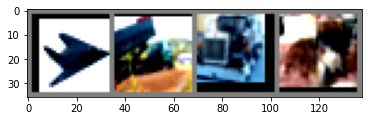

In [6]:
# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

***MODIFY SECTION***

**NOTE: IN THIS SECTION, UNCOMMENT THE MODEL THAT YOU WOULD LIKE TO UTILIZE AND COMMENT OUT THE TWO MODELS NOT BEING UTILZING. THIS IS THE ONLY SECTION THAT IS NOT MODIFIED**

In [7]:
#CNN
import torch.nn as nn
#import torch.nn.functional as F

class Network(nn.Module):
    def __ini__(self):
        pass
    def forward(self,x):
        pass


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,32,5)
        self.conv2 = nn.Conv2d(32,64,9)
        self.conv3 = nn.Conv2d(64,128,9)
        self.conv4 = nn.Conv2d(128,256,9)
        self.fc1 = nn.Linear(256*4*4, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)
    def forward(self, x):
        #x = F.relu(self.fc1(x))
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 4096)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
net = net.to(device)


#**************************************************
#**************************************************
# MLP

#import torch.nn as nn

#class Net(nn.Module):
#    def __init__(self):
#        super(Net, self).__init__()
#        self.fc1 = nn.Linear(3*32*32, 4096)
#        self.fc2 = nn.Linear(4096, 4096)
#        self.fc3 = nn.Linear(4096, 4096)
#        self.fc4 = nn.Linear(4096, 4096)
#        self.fc5 = nn.Linear(4096,4096)
#        self.fc6 = nn.Linear(4096,4096)
#        self.fc7 = nn.Linear(4096, 10)
#    def forward(self, x):
#        x = x.view(-1, 3*32*32)
#        x = F.relu(self.fc1(x))
#        x = F.relu(self.fc2(x))
#        x = F.relu(self.fc3(x))
#        x = F.relu(self.fc4(x))
#        x = F.relu(self.fc5(x))
#        x = F.relu(self.fc6(x))
#        x = F.relu(self.fc7(x))
#        return x
#net = Net()
#net = net.to(device)


#**************************************************
#**************************************************

#neural network without non-linear activation functions

#import torch.nn as nn



#class Network(nn.Module):
#    def __ini__(self):
#        pass
#    def forward(self,x):
#        pass


#class Net(nn.Module):
#    def __init__(self):
#        super(Net, self).__init__()
#        self.fc1 = nn.Linear(3*32*32, 4096)
#        self.fc2 = nn.Linear(4096, 4096)
#        self.fc3 = nn.Linear(4096, 4096)
#        self.fc4 = nn.Linear(4096, 4096)
#        self.fc5 = nn.Linear(4096, 4096)
#        self.fc6 = nn.Linear(4096, 4096)
#        self.fc7 = nn.Linear(4096, 10)
#    def forward(self, x):
#        x = x.view(-1, 3*32*32)
#        x = self.fc1(x)
#        x = self.fc2(x)
#        x = self.fc3(x)
#        x = self.fc4(x)
#        x = self.fc5(x)
#        x = self.fc6(x)
#        x = self.fc7(x)
#        return x
#net = Net()
#net = net.to(device)



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^




In [8]:
#import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [9]:
for epoch in range(35):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        
        # use gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

PATH = './cifar_netpth'
torch.save(net.state_dict(), PATH)


[1,  2000] loss: 2.122
[1,  4000] loss: 1.938
[1,  6000] loss: 1.807
[1,  8000] loss: 1.757
[1, 10000] loss: 1.674
[1, 12000] loss: 1.626
[2,  2000] loss: 1.561
[2,  4000] loss: 1.550
[2,  6000] loss: 1.491
[2,  8000] loss: 1.456
[2, 10000] loss: 1.422
[2, 12000] loss: 1.377
[3,  2000] loss: 1.338
[3,  4000] loss: 1.335
[3,  6000] loss: 1.296
[3,  8000] loss: 1.254
[3, 10000] loss: 1.242
[3, 12000] loss: 1.244
[4,  2000] loss: 1.201
[4,  4000] loss: 1.172
[4,  6000] loss: 1.154
[4,  8000] loss: 1.149
[4, 10000] loss: 1.142
[4, 12000] loss: 1.118
[5,  2000] loss: 1.060
[5,  4000] loss: 1.098
[5,  6000] loss: 1.076
[5,  8000] loss: 1.084
[5, 10000] loss: 1.077
[5, 12000] loss: 1.062
[6,  2000] loss: 1.007
[6,  4000] loss: 1.022
[6,  6000] loss: 1.001
[6,  8000] loss: 1.009
[6, 10000] loss: 0.983
[6, 12000] loss: 0.991
[7,  2000] loss: 0.962
[7,  4000] loss: 0.964
[7,  6000] loss: 0.975
[7,  8000] loss: 0.926
[7, 10000] loss: 0.956
[7, 12000] loss: 0.937
[8,  2000] loss: 0.889
[8,  4000] 

In [31]:
PATH = './cifar_netpth'
torch.save(net.state_dict(), PATH)

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


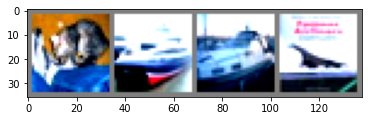

In [32]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %
